In [72]:
# LIBRARIES:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import csv
import os 
import string

plt.style.use('Solarize_Light2')

In [29]:
#import nltk
#nltk.download()

In [4]:
DATA_PATH = 'C:/Users/Adrian/Desktop/tweeter'
log = pd.read_csv(os.path.join(DATA_PATH, 'keys.csv')) 

# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret =log['key'][3]

# Create autjentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# Set the acces token and acces token secret
authenticate.set_access_token(accesToken,accesTokenSecret)
# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
# Open file to append data
csvFile = open(os.path.join(DATA_PATH, 'dataset.csv'), 'a')
csvWriter = csv.writer(csvFile)

In [100]:
# Get Tweets
HashValue = "Arsenal"
StartDate = "2020-12-28"
tweets = tweepy.Cursor(api.search, q=HashValue, tweet_mode='extended', lang='en',since=StartDate).items(5000)

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df.head()

In [81]:
# Cleaning the data
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #@mentions
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, '')  
    return text

df.Tweets = df.Tweets.apply(lambda x: clean_text(x))
df.head()

,Tweets,Subjectivity,Polarity
0,DeeOneAyekooto Up Arsenal 💕💕💕,0.000000,0.000000
1,You have Thomas Partey but Yves Bissouma is gi...,0.000000,0.000000
2,New Arsenal jacket is 🔥🔥🔥 arsenal adidas adida...,0.454545,0.136364
3,Liverpool running away with the title are cle...,0.524242,0.187273
4,Interested Arsenal fan in Lagos Nigeria,0.500000,0.250000


In [82]:
# explaination about sentiments: 
# Each word in the lexicon has scores for:
# 1)     polarity: negative vs. positive    (-1.0 => +1.0)
# 2) subjectivity: objective vs. subjective (+0.0 => +1.0)
# https://planspace.org/20150607-textblob_sentiment

def getSubjectivity(text):
    return TextBlob(text).sentiment[1]

def getPolarity(text):
    return TextBlob(text).sentiment[0]

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df[0:100]

,Tweets,Subjectivity,Polarity
0,DeeOneAyekooto Up Arsenal 💕💕💕,0.000000,0.000000
1,You have Thomas Partey but Yves Bissouma is gi...,0.000000,0.000000
2,New Arsenal jacket is 🔥🔥🔥 arsenal adidas adida...,0.454545,0.136364
3,Liverpool running away with the title are cle...,0.524242,0.187273
4,Interested Arsenal fan in Lagos Nigeria,0.500000,0.250000
...,...,...,...
95,AFCGenius Bukayo Saka playing at Right Wing fo...,0.767857,0.142857
96,LFCApproved They cancelling the Spurs v Fulham...,0.400000,-0.400000
97,Last seasonBeat Leicester to Spurs Chelsea ...,0.066667,0.000000
98,Also he’s scored a goal every games for arsenal,0.000000,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

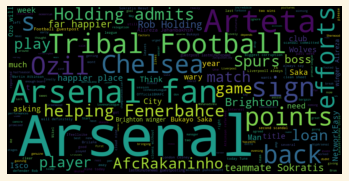

In [83]:
# Plot of the most used words
allWords = ''.join( [tweet for tweet in df['Tweets']] )
wordCloud = WordCloud(width = 800, height = 400, random_state = 42).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [90]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'
        
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,DeeOneAyekooto Up Arsenal 💕💕💕,0.000000,0.000000,Neutral
1,You have Thomas Partey but Yves Bissouma is gi...,0.000000,0.000000,Neutral
2,New Arsenal jacket is 🔥🔥🔥 arsenal adidas adida...,0.454545,0.136364,Positive
3,Liverpool running away with the title are cle...,0.524242,0.187273,Positive
4,Interested Arsenal fan in Lagos Nigeria,0.500000,0.250000,Positive
...,...,...,...,...
95,AFCGenius Bukayo Saka playing at Right Wing fo...,0.767857,0.142857,Positive
96,LFCApproved They cancelling the Spurs v Fulham...,0.400000,-0.400000,Negative
97,Last seasonBeat Leicester to Spurs Chelsea ...,0.066667,0.000000,Neutral
98,Also he’s scored a goal every games for arsenal,0.000000,0.000000,Neutral


In [93]:
sentiment_score = df.loc[df['Analysis'] == 'Positive', 'Tweets'].count() / len(df)
print(f'Sentiment Score = {sentiment_score*100}%')

sentiment_nscore = df.loc[df['Analysis'] == 'Negative', 'Tweets'].count() / len(df)
print(f'Sentiment NScore = {sentiment_nscore*100}%')

Sentiment Score = 51.0%


<function matplotlib.pyplot.show(*args, **kw)>

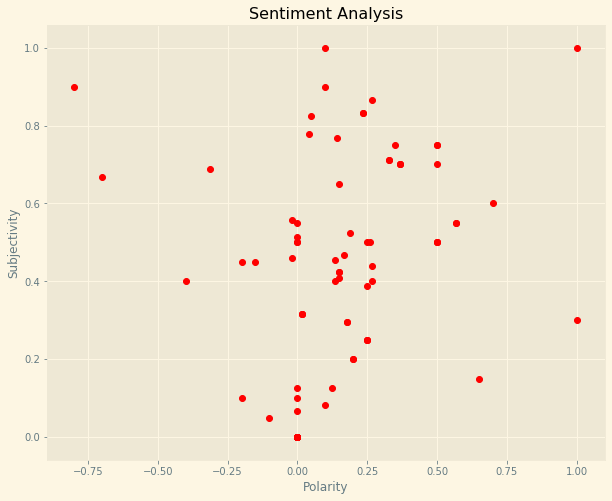

In [98]:
# plot polarity and subjectivity
plt.figure(figsize=(10,8))
for i in range(len(df)):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='red')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

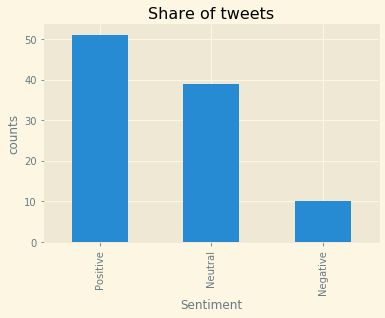

In [99]:
#  plot share of pos/neg/neut tweets
plt.title('Share of tweets')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show